# BANK CUSTOMER RETIREMENT PREDICTION

# PROBLEM STATEMENT

Task is to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.).

# IMPORTING DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Bank_Customer_Retirement.csv")

In [3]:
data.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [4]:
data.describe()

,Customer ID,Age,401K Savings,Retire
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,46.757077,534984.465804,0.500000
std,144.481833,7.790125,187675.818881,0.500501
min,0.000000,25.000000,10.000000,0.000000
25%,124.750000,41.299451,382626.524425,0.000000
50%,249.500000,46.695770,534512.984350,0.500000
75%,374.250000,52.322551,680670.257025,1.000000
max,499.000000,70.000000,1000000.000000,1.000000


In [5]:
data.isna().sum()

Customer ID     0
Age             0
401K Savings    0
Retire          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Customer ID     500 non-null int64
Age             500 non-null float64
401K Savings    500 non-null float64
Retire          500 non-null int64
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


In [7]:
data.shape

(500, 4)

# VISUALIZING DATA

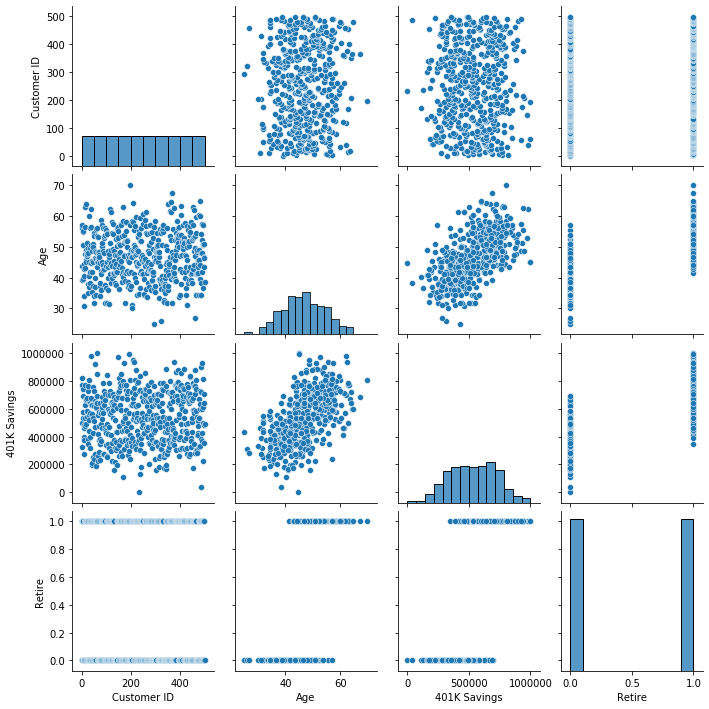

In [8]:
sns.pairplot(data)

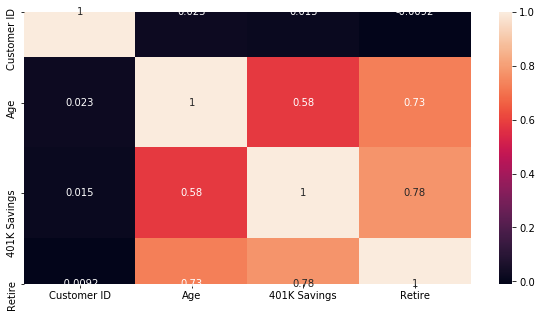

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

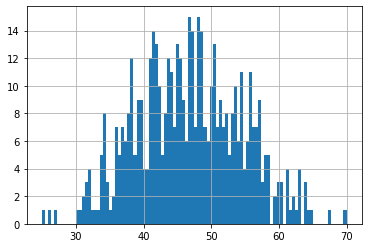

In [10]:
data['Age'].hist(bins=100)

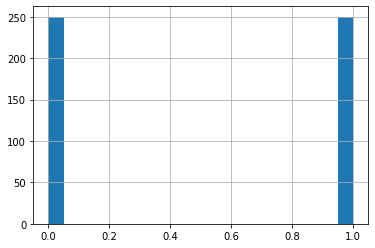

In [11]:
data.Retire.hist(bins=20)

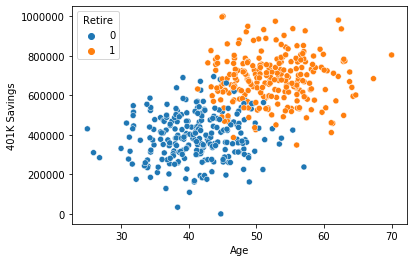

In [12]:
sns.scatterplot(x='Age', y='401K Savings',hue='Retire', data=data)

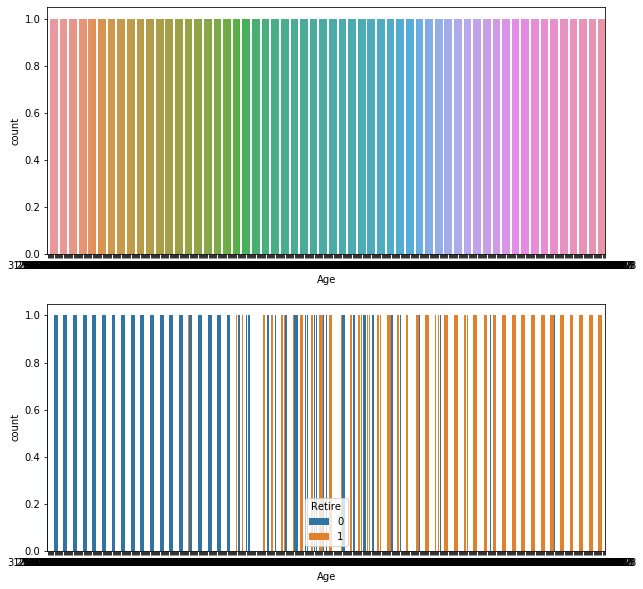

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.countplot(x = 'Age', data = data)
plt.subplot(212)
sns.countplot(x = 'Age' ,hue = 'Retire', data=data)

C:\Users\bhara_5sejtsc\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


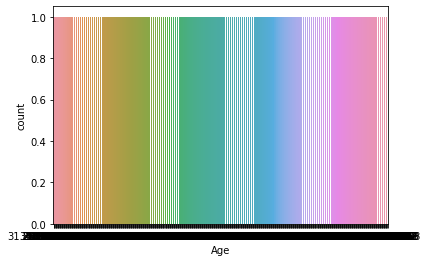

In [17]:
sns.countplot(data['Age'])

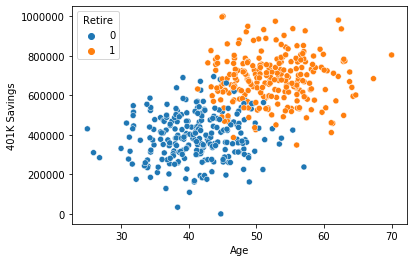

In [19]:
sns.scatterplot(x = 'Age', y = '401K Savings', hue = 'Retire',data=data)

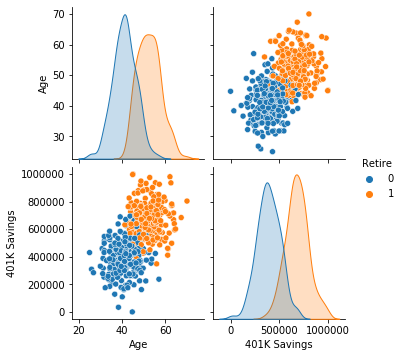

In [21]:
sns.pairplot(data, hue = 'Retire', vars = ['Age','401K Savings'])

C:\Users\bhara_5sejtsc\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


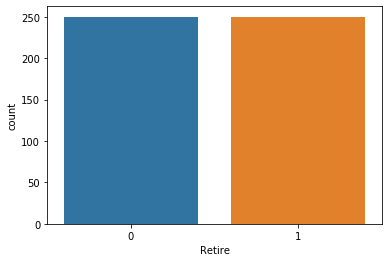

In [22]:
sns.countplot(data.Retire, label='Retirement')

# MODEL TRAINING

In [23]:
data.shape

(500, 4)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Customer ID     500 non-null int64
Age             500 non-null float64
401K Savings    500 non-null float64
Retire          500 non-null int64
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


In [26]:
X = data.drop(['Customer ID','Retire'],axis=1)

In [27]:
y = data.Retire

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state = 42)

In [82]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
svc.fit(X_train,y_train)

SVC(random_state=0)

# EVALUATING MODEL

In [83]:
y_pred = svc.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)

In [85]:
print(cm)

[[114  10]
 [ 21 105]]


In [86]:
accuracy_score(y_test,y_pred)

0.876

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       124
           1       0.91      0.83      0.87       126

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



# IMPROVING THE MODEL

In [88]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [89]:
svc.fit(X_train,y_train)

SVC(random_state=0)

In [90]:
y_pred = svc.predict(X_test)

In [91]:
cm = confusion_matrix(y_test,y_pred)

In [92]:
print(cm)

[[117   7]
 [  6 120]]


In [93]:
accuracy_score(y_test,y_pred)

0.948

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       124
           1       0.94      0.95      0.95       126

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [95]:
params = {'C': [0.1, 1, 10, 100] ,'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf'] }

In [96]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svc,params,refit = True, verbose = 4)

In [97]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [98]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [99]:
grid.best_estimator_

SVC(C=100, gamma=1, random_state=0)

In [100]:
grid_pred = grid.predict(X_test)

In [101]:
cm = confusion_matrix(y_test,y_pred)

In [102]:
print(cm)

[[117   7]
 [  6 120]]


In [103]:
accuracy_score(y_test,y_pred)

0.948

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       124
           1       0.94      0.95      0.95       126

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

